In [27]:
import torch
import os
import cv2
import os
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from IPython.display import Image, display

In [28]:
import zipfile
import os

# Ruta local al ZIP
zip_path = "kaggle/working/S3R2-KIIT/S3R2-KIIT.zip"
extract_path = "kaggle/working/S3R2-KIIT/dataset"

# Crear carpeta si no existe
os.makedirs(extract_path, exist_ok=True)

# Extraer el ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar contenido extraído
print("Contenido extraído:", os.listdir(extract_path))


Contenido extraído: ['S3R2-KIIT']


In [29]:
import os

folder_path = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT'

if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    for file in files:
        print(file)
else:
    print(f"La carpeta no existe: {folder_path}")


valid
S3R2_data.yaml
train
test


In [30]:
import os

# Ruta actual donde está el dataset (ajustado desde tus pruebas anteriores)
folder_path = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT'

# Define the paths for train, valid, and test directories
base_dir = folder_path
dirs = ['train', 'valid', 'test']

for dir_name in dirs:
    dir_path = os.path.join(base_dir, dir_name)
    print(f"\nDirectory: {dir_name}")
    for subfolder in os.listdir(dir_path):
        subfolder_path = os.path.join(dir_path, subfolder)

        if os.path.isdir(subfolder_path):
            num_files = len([
                f for f in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, f))
            ])
            print(f"  Subfolder: {subfolder}, Number of files: {num_files}")



Directory: train
  Subfolder: labels, Number of files: 3
  Subfolder: images, Number of files: 3

Directory: valid
  Subfolder: labels, Number of files: 3
  Subfolder: images, Number of files: 3

Directory: test
  Subfolder: labels, Number of files: 3
  Subfolder: images, Number of files: 4


In [31]:
yaml_file_path = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/S3R2_data.yaml'

with open(yaml_file_path, 'r') as file:
    yaml_content = file.read()

print(yaml_content)


train: S3R2-KIIT/train/images
val: S3R2-KIIT/valid/images
test: S3R2-KIIT/test/images

nc: 3
names: ['car', 'bike', 'person']



In [32]:
import os

label_dir = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/labels'
label_file = 'image_s3r2_kiit_116.txt'

label_path = os.path.join(label_dir, label_file)

if not os.path.exists(label_path):
    print(f"Label file not found: {label_path}")
else:
    with open(label_path, 'r') as f:
        lines = f.readlines()

    print(f"Label file: {label_file}")
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        print(f"Class ID: {int(class_id)}")
        print(f"Bounding Box: x_center={x_center}, y_center={y_center}, width={width}, height={height}")
        print("-" * 50)


Label file not found: kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/labels/image_s3r2_kiit_116.txt


In [33]:
import os

# Ruta local al archivo de etiquetas
label_dir = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/labels'
label_file = 'image_s3r2_kiit_116.txt'
label_path = os.path.join(label_dir, label_file)

# Lista de nombres de clases
class_names = [
    "Artilary",             # ID 0
    "Missile",              # ID 1
    "Radar",                # ID 2
    "M. Rocket Launcher",   # ID 3
    "Soldier",              # ID 4
    "Tank",                 # ID 5
    "Vehicle"               # ID 6
]

# Leer y mostrar información del archivo
if not os.path.exists(label_path):
    print(f"Label file not found: {label_path}")
else:
    with open(label_path, 'r') as f:
        lines = f.readlines()

    print(f"Label file: {label_file}")
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        class_id = int(class_id)
        class_name = class_names[class_id] if class_id < len(class_names) else "Unknown"

        print(f"Class: {class_name} (ID {class_id})")
        print(f"Bounding Box: x_center={x_center}, y_center={y_center}, width={width}, height={height}")
        print("-" * 50)


Label file not found: kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/labels/image_s3r2_kiit_116.txt


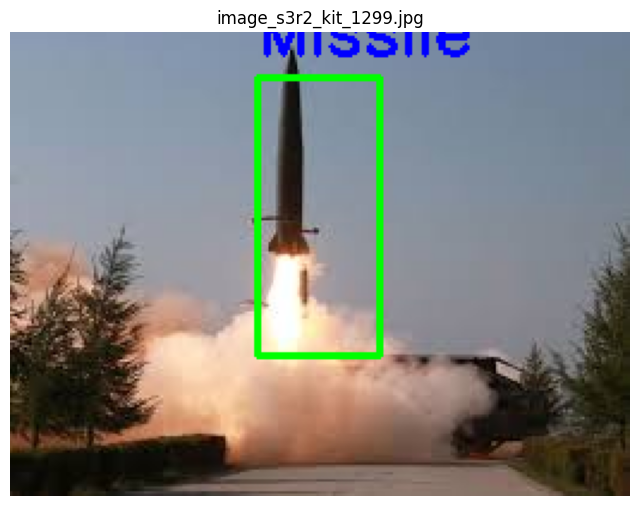

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Clases
class_names = [
    "Artilary", "Missile", "Radar", "M. Rocket Launcher",
    "Soldier", "Tank", "Vehicle"
]

# Rutas locales en tu entorno
image_dir = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/images'
annotation_dir = 'kaggle/working/S3R2-KIIT/dataset/S3R2-KIIT/test/labels'

def visualize_image_with_annotations(image_name):
    image_path = os.path.join(image_dir, image_name)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Image not found: {image_path}")
        return

    annotation_name = os.path.splitext(image_name)[0] + '.txt'
    annotation_path = os.path.join(annotation_dir, annotation_name)

    if not os.path.exists(annotation_path):
        print(f"Annotation not found: {annotation_path}")
        return

    img_height, img_width = img.shape[:2]

    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        x_center = int(x_center * img_width)
        y_center = int(y_center * img_height)
        width = int(width * img_width)
        height = int(height * img_height)

        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        # Dibujar caja
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)

        # Dibujar texto, evitando que se salga de la imagen
        class_name = class_names[int(class_id)]
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.9
        thickness = 2
        text_size, _ = cv2.getTextSize(class_name, font, font_scale, thickness)
        text_x = x_min
        text_y = y_min - 10

        # Si el texto se sale del borde superior, lo movemos dentro del bbox
        if text_y < text_size[1]:
            text_y = y_min + text_size[1] + 5

        cv2.putText(img, class_name, (text_x, text_y), font, font_scale, (255, 0, 0), thickness)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(image_name)
    plt.show()

# Visualizar una imagen
visualize_image_with_annotations('image_s3r2_kit_1299.jpg')
